In [109]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['CMU Sans Serif']
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 1200
plt.ion()
import pandas as pd
import numpy  as np
%matplotlib inline
import ternary
import math
import glob
import re
rcParams['figure.figsize'] = 14,4
def USD(x): return x

In [110]:
s = "../cmake-build-debug/output/kelly_bettor"

P = []
with open(s +'/prices.txt', 'r') as content_file:
    for l in content_file.readlines():
        P.append(float(l.split('USD(')[1].split(')')[0]))
offset_prices = 0 
prices = np.array(P)[offset_prices:-1]

volatility = np.std(np.log( prices.flatten()[1:] 
                          / prices.flatten()[:-1])
                          ) / (np.sqrt(1/252))

D = []
with open(s +'/0_dividend.txt', 'r') as content_file:
    for l in content_file.readlines():
        D.append(float(l.split(',')[1].split(')')[0]))
dividends = np.array(D)[offset_prices::2] 

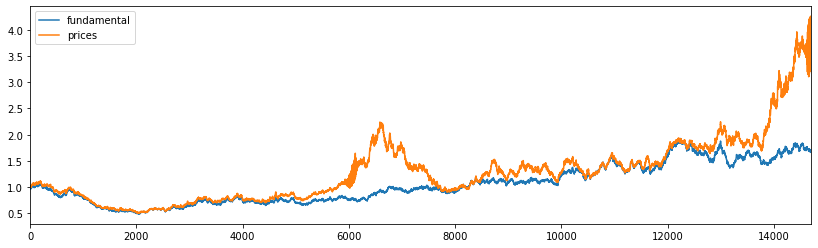

In [111]:
plt.plot(dividends[:2*25200][offset_prices//2:]  /dividends[0], label='fundamental')
plt.plot(prices[:2*25200]   /prices[0], label='prices')
plt.xlim([0, min(len(prices), len(dividends))])
#plt.yscale('log')
plt.legend()

In [112]:
def readsignal(fund):
    P = []
    with open(s +f'/_{fund}__signal.txt', 'r') as content_file:
        for l in content_file.readlines():
            P.append(float(l.split(',')[1].split(')')[0]))
    prices = np.array(P)
    return prices

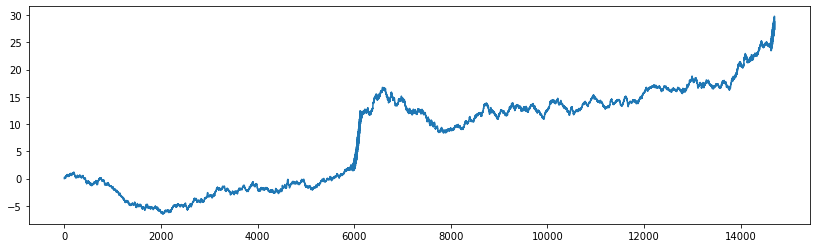

In [113]:
#plt.plot(readsignal(2).cumsum())

plt.plot(readsignal(4).cumsum())
#plt.xlim([0,200])
#plt.ylim([0,1])

# Plot investment signal

(0, 22.0)

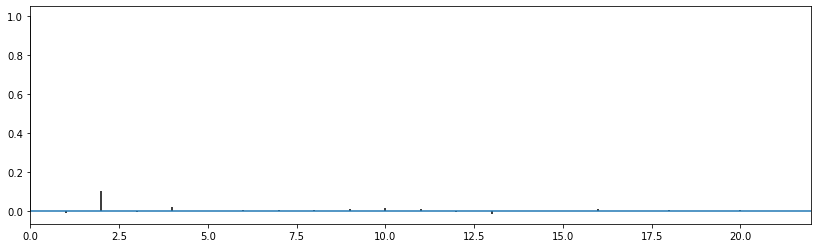

In [114]:
plt.acorr(np.diff(np.log(dividends)), maxlags = 20)
plt.xlim([0,None])

(0, 22.0)

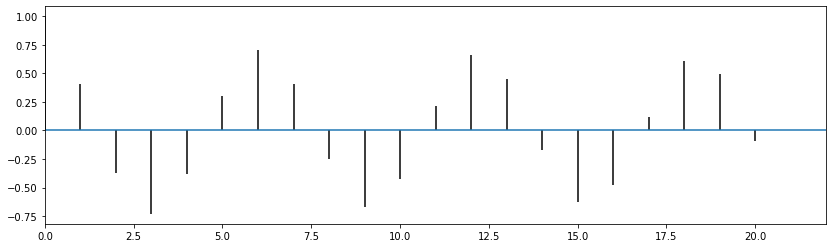

In [115]:
plt.acorr(np.diff(np.log(prices)), maxlags = 20)
plt.xlim([0,None])


In [116]:
def readnet_asset_value(fund):
    P = []
    with open(s +f'/_{fund}__net_asset_value.txt', 'r') as content_file:
        for l in content_file.readlines():
            P.append(float(l.split('USD(')[1].split(')')[0]))
    prices = np.array(P)
    offset_prices = 252    
    volatility = np.std(np.log( prices.copy().flatten()[offset_prices:][1:] 
                              / prices.copy().flatten()[offset_prices:][:-1])
                              ) / (np.sqrt(1/252))
    
    return prices

In [117]:
def readpnl(fund):
    P = []
    with open(s +f'/_{fund}__pnl.txt', 'r') as content_file:
        for l in content_file.readlines():
            P.append(float(l.split('USD(')[1].split(')')[0]))
    prices = np.array(P)
    return prices

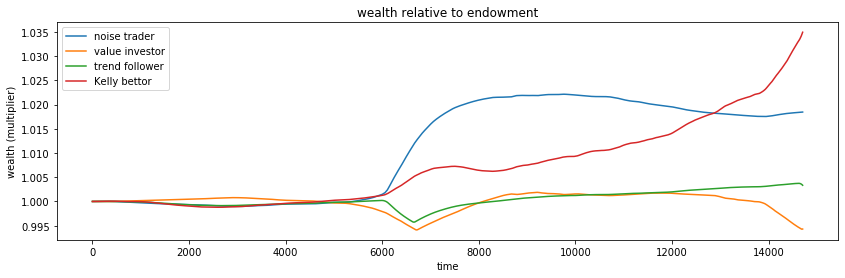

In [118]:
start=252*0
stop = start+2*25_200

concentrations = [0.378, 0.297, 0.225, 0.100]

NAV2 = concentrations[0] * 200_000_000 + 10 * readpnl(2)[start:stop].cumsum()
NAV3 = concentrations[1] * 200_000_000 + 10 *  readpnl(3)[start:stop].cumsum()
NAV4 = concentrations[2] * 200_000_000 + 10 *  readpnl(4)[start:stop].cumsum()
NAV5 = concentrations[3] * 200_000_000 + 10 *  readpnl(5)[start:stop].cumsum()

stop = min(stop-start, len(NAV2), len(NAV3), len(NAV4))

NAV2 = concentrations[0] * 200_000_000 + 10 *  readpnl(2)[start:stop].cumsum()
NAV3 = concentrations[1] * 200_000_000 + 10 *  readpnl(3)[start:stop].cumsum()
NAV4 = concentrations[2] * 200_000_000 + 10 *  readpnl(4)[start:stop].cumsum()
NAV5 = concentrations[3] * 200_000_000 + 10 *  readpnl(5)[start:stop].cumsum()

plt.plot(NAV2/NAV2[0], label="noise trader")
plt.plot(NAV3/NAV3[0], label="value investor")
plt.plot(NAV4/NAV4[0], label="trend follower")
plt.plot(NAV5/NAV5[0], label="Kelly bettor")
plt.ylabel("wealth (multiplier)")
plt.xlabel("time")
plt.title("wealth relative to endowment")
plt.legend()